### ①複数のカラー自分で定義したい
    参考文献＜https://stackoverflow.com/questions/43214350/color-of-the-node-of-tree-with-graphviz-using-class-names＞

In [13]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file= None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [int(255 * v / sum(values)) for v in values]
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
        node.set_fillcolor(color)

graph.write_png('colored_tree.png')

True

### ②jupyter notebook上表示させたい
    https://funmatu.wordpress.com/2017/04/25/%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%A8%E3%81%8B%E3%82%B0%E3%83%A9%E3%83%95%E6%A7%8B%E9%80%A0%EF%BC%88dot%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%EF%BC%89%E3%82%92jupyter%E4%B8%8A%E3%81%A7%E8%A1%A8%E7%A4%BA/

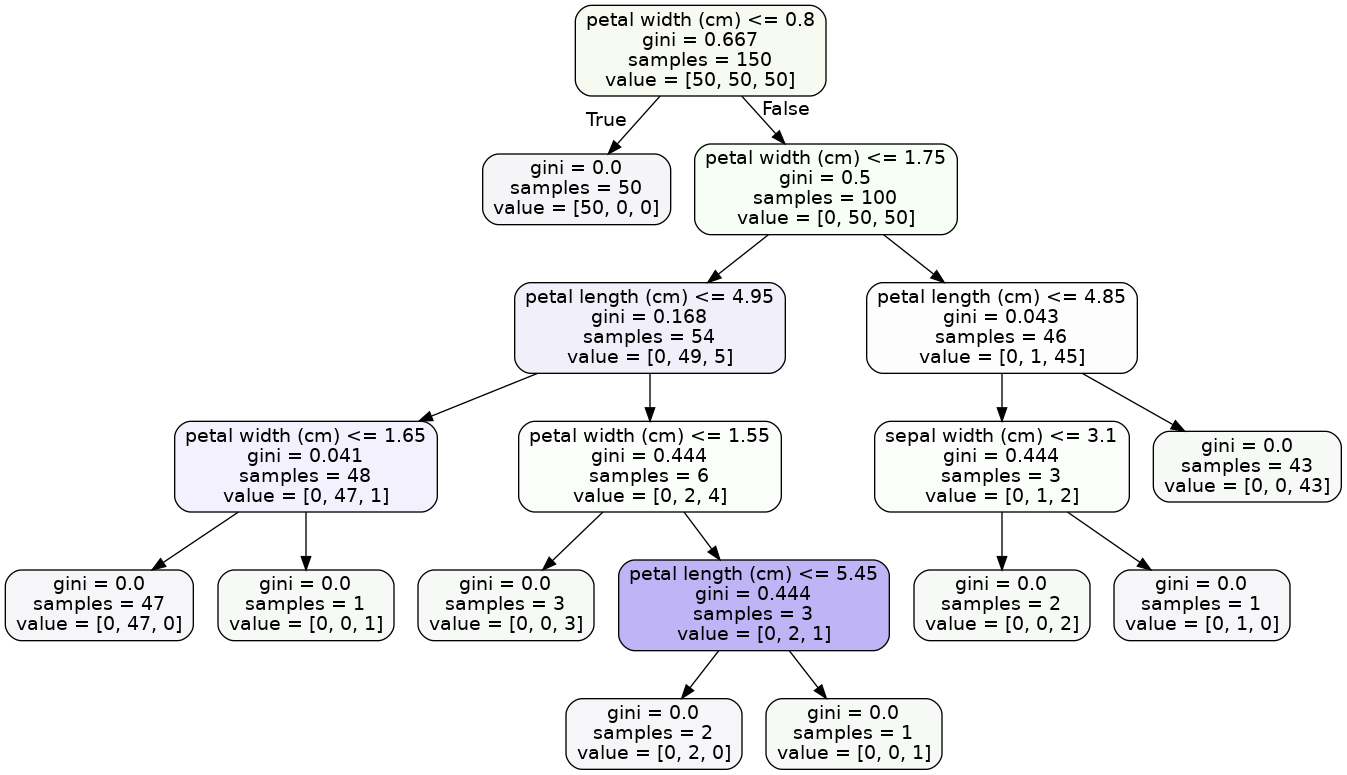

In [11]:
import pydotplus
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file= None,
                                filled=True,
                                rounded=True)

graph_new = pydotplus.graph_from_dot_data(dot_data)
nodes = graph_new.get_node_list()
edges = graph_new.get_edge_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [int(255 * v /sum(values)) for v in values]
        color = '#{:02x}{:02x}{:02x}'.format(values[0]+50,values[1]+100,values[2]+250)
        node.set_fillcolor(color)


# graph = pydotplus.graphviz.graph_from_dot_file('iris_data.dot')
# graph_new.write_png('write.png')

Image(graph_new.create_png())

In [4]:
type(values[0])

int

### ➂三つ以上のクラスがある場合、一番最後のノードに着色する

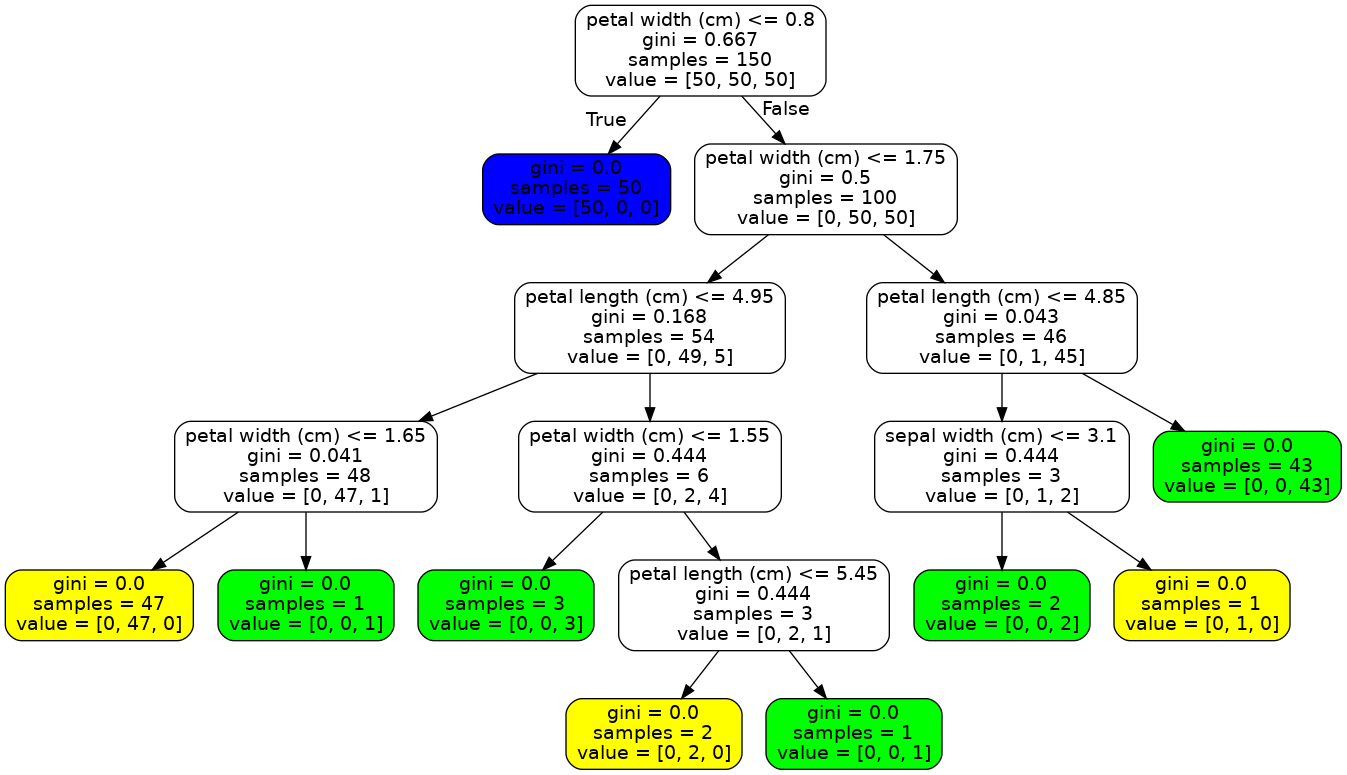

In [12]:

import pydotplus
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file= None,
                                filled=True,
                                rounded=True)

graph_new = pydotplus.graph_from_dot_data(dot_data)
nodes = graph_new.get_node_list()
edges = graph_new.get_edge_list()

colors = ('blue','yellow','green','pink','white')

for node in nodes:
    if node.get_name() not in ('node','edge'):
        values = clf.tree_.value[int(node.get_name())][0]
        #クラス一層しかないノードに着色させる
        if max(values) == sum(values):
            node.set_fillcolor(colors[np.argmax(values)])
        #クラス一層以上の場合、デフォルトのカラーにする
        else:
            node.set_fillcolor(colors[-1])
            
# graph = pydotplus.graphviz.graph_from_dot_file('iris_data_1.dot')
# graph_new.write_png('colored_tree_-1.png')

Image(graph_new.create_png())